In [1]:
from my_snn.rsnn import RSNN, RSNN_2l, RSNN_2l_ALIF
from my_snn.rsnn_delays import RSNN_d_d, RSNN_d_i, RSNN_d_all
from my_snn.tonic_dataloader import DatasetLoader
from my_snn.custom_dataloader import AddTaskDatasetLoader
from my_snn.utils import train, training_plots, ModelLoader
import torch
device = "cuda:0"

time_window = 50
batch_size = 128 # 128: anil kag
from torch.utils.data import DataLoader
#d_train = AddTaskDatasetLoader(time_window, batch_size)
d_train = AddTask2DatasetLoader(time_window, batch_size, randomness=True)
d_test = AddTask2DatasetLoader(time_window, batch_size, randomness=True) # 2560 from schmiduber paper
train_loader = DataLoader(d_train, batch_size=batch_size, num_workers=0)
test_loader = DataLoader(d_test, batch_size=batch_size, num_workers=0)
ckpt_dir = 'addsum_tests'

data = train_loader, test_loader

def test_fn(snn, ckpt_dir, test_loader, max_acc, epoch):
    if (epoch + 1) % 5 == 0:
        #if epoch>=50:
            #print('pooling delays')
            #snn.pool_delays('i', k= 10, freeze=False)
        for images, labels in test_loader:
            pred, ref = snn.propagate(images.to(device), labels.to(device))
            
        correct = torch.sum(abs(pred-ref) < 0.04)
        print(f'Test set accuracy: {100*correct.item()/len(images)}% ')
        print('--------------------------')
    return max_acc

delays: [0]
RSNN_d_i(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=2, out_features=128, bias=False)
  (r1_r1): Linear(in_features=128, out_features=128, bias=False)
  (r1_o): Linear(in_features=128, out_features=1, bias=False)
)
Total params: 16768
Total mult-adds (M): 0.8384
training custom_2_1_12850_RSNN_d_i_1l128_1d1.t7 for 5000 epochs...
Epoch [1/5000]
Step [1/1], Loss: 0.56743
Time elasped: 0.11499977111816406
Epoch [2/5000]


C:\Users\saucedo\Python\SRNN_tests\my_snn\custom_dataloader.py:216: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(image[idxa,0]+image[idxb,0])


Step [1/1], Loss: 0.33387
Time elasped: 0.11600065231323242
Epoch [3/5000]
Step [1/1], Loss: 0.19002
Time elasped: 0.1139993667602539
Epoch [4/5000]
Step [1/1], Loss: 0.19837
Time elasped: 0.11600017547607422
Epoch [5/5000]
Step [1/1], Loss: 0.28473
Time elasped: 0.11399960517883301
Test set accuracy: 8.59375% 
--------------------------
Epoch [6/5000]
Step [1/1], Loss: 0.19270
Time elasped: 0.11600065231323242
Epoch [7/5000]
Step [1/1], Loss: 0.29213
Time elasped: 0.11500048637390137
Epoch [8/5000]
Step [1/1], Loss: 0.21999
Time elasped: 0.11599922180175781
Epoch [9/5000]
Step [1/1], Loss: 0.20674
Time elasped: 0.11799979209899902
Epoch [10/5000]
Step [1/1], Loss: 0.20791
Time elasped: 0.11999988555908203
Test set accuracy: 4.6875% 
--------------------------
Epoch [11/5000]
Step [1/1], Loss: 0.17203
Time elasped: 0.11499953269958496
Epoch [12/5000]
Step [1/1], Loss: 0.19680
Time elasped: 0.11599969863891602
Epoch [13/5000]
Step [1/1], Loss: 0.16713
Time elasped: 0.11500048637390137
E

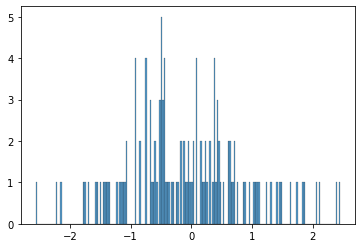

In [9]:
surr='fs'

n_h = 128

name= f'add2_{time_window}_rnn_{n_h}_{surr}'

hidden = (n_h, 1, 'r')
snn = RSNN_d_i('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(1,1), thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction2', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)

delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
RSNN_d_d(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=2, out_features=128, bias=False)
  (f1_o): Linear(in_features=6400, out_features=1, bias=False)
)
Total params: 6656
Total mult-adds (M): 0.3328
training custom_2_1_12850_RSNN_d_d_1l128_50d1.t7 for 5000 epochs...
Epoch [1/5000]
Step [1/1], Loss: 2.92972
Time elasped: 0.140000581741333
Epoch [2/5000]


C:\Users\saucedo\Python\SRNN_tests\my_snn\custom_dataloader.py:216: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(image[idxa,0]+image[idxb,0])


Step [1/1], Loss: 2.90558
Time elasped: 0.13399934768676758
Epoch [3/5000]
Step [1/1], Loss: 1.91717
Time elasped: 0.12999916076660156
Epoch [4/5000]
Step [1/1], Loss: 0.17492
Time elasped: 0.13203024864196777
Epoch [5/5000]
Step [1/1], Loss: 0.94232
Time elasped: 0.13097119331359863
Test set accuracy: 0.0% 
--------------------------
Epoch [6/5000]
Step [1/1], Loss: 1.63263
Time elasped: 0.1380002498626709
Epoch [7/5000]
Step [1/1], Loss: 0.76157
Time elasped: 0.13302874565124512
Epoch [8/5000]
Step [1/1], Loss: 0.16830
Time elasped: 0.13097119331359863
Epoch [9/5000]
Step [1/1], Loss: 0.45897
Time elasped: 0.13199901580810547
Epoch [10/5000]
Step [1/1], Loss: 0.88631
Time elasped: 0.12999963760375977
Test set accuracy: 0.0% 
--------------------------
Epoch [11/5000]
Step [1/1], Loss: 0.72532
Time elasped: 0.13100051879882812
Epoch [12/5000]
Step [1/1], Loss: 0.30081
Time elasped: 0.13303065299987793
Epoch [13/5000]
Step [1/1], Loss: 0.23344
Time elasped: 0.12996816635131836
Epoch [1

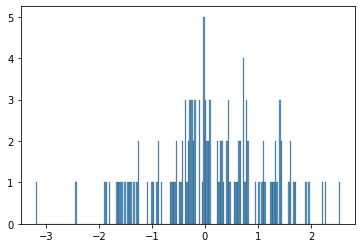

In [2]:
surr='fs'

name= f'add2_{time_window}_d_128_{surr}'

hidden = (128, 1, 'f')
snn = RSNN_d_d('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(50,1), thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction2', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)

delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
RSNN_d_i(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=100, out_features=32, bias=False)
  (f1_o): Linear(in_features=32, out_features=1, bias=False)
)
Total params: 3232
Total mult-adds (M): 0.1616
training custom_2_1_12850_RSNN_d_i_1l32_50d1.t7 for 5000 epochs...
Epoch [1/5000]
Step [1/1], Loss: 0.77762
Time elasped: 0.2590360641479492
Epoch [2/5000]
Step [1/1], Loss: 0.78727
Time elasped: 0.14000153541564941
Epoch [3/5000]
Step [1/1], Loss: 0.61531
Time elasped: 0.13899970054626465
Epoch [4/5000]
Step [1/1], Loss: 0.52556
Time elasped: 0.14200949668884277
Epoch [5/5000]
Step [1/1], Loss: 0.47030
Time elasped: 0.1399998664855957
Test set accuracy: 7.03125% 
--------------------------
Epoch [6/5000]
Step [1/1], Loss: 0.42076
Time elasped: 0.14302563667297363
Epoch [7/5000]
Step [1

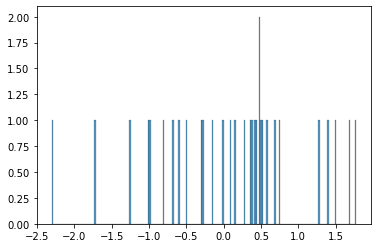

In [2]:
surr='fs'

n_h = 32

name= f'add2_{time_window}_d_{n_h}_{surr}'

hidden = (n_h, 1, 'f')
snn = RSNN_d_i('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(50,1), thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction2', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)

delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
RSNN_d_i(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=100, out_features=8, bias=False)
  (f1_o): Linear(in_features=8, out_features=1, bias=False)
)
Total params: 808
Total mult-adds (M): 0.0404
training custom_2_1_12850_RSNN_d_i_1l8_50d1.t7 for 5000 epochs...
Epoch [1/5000]
Step [1/1], Loss: 0.55879
Time elasped: 0.11079049110412598
Epoch [2/5000]
Step [1/1], Loss: 0.48257
Time elasped: 0.11003518104553223
Epoch [3/5000]
Step [1/1], Loss: 0.35736
Time elasped: 0.11096978187561035
Epoch [4/5000]
Step [1/1], Loss: 0.40228
Time elasped: 0.11100006103515625
Epoch [5/5000]
Step [1/1], Loss: 0.29217
Time elasped: 0.1100001335144043
Test set accuracy: 6.25% 
--------------------------
Epoch [6/5000]
Step [1/1], Loss: 0.26473
Time elasped: 0.1120004653930664
Epoch [7/5000]
Step [1/1], Lo

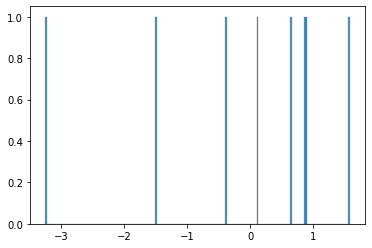

In [3]:
surr='fs'

n_h = 8

name= f'add2_{time_window}_d_{n_h}_{surr}'

hidden = (n_h, 1, 'f')
snn = RSNN_d_i('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(50,1), thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction2', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)

delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
RSNN_d_i(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=100, out_features=2, bias=False)
  (f1_o): Linear(in_features=2, out_features=1, bias=False)
)
Total params: 202
Total mult-adds (M): 0.0101
training custom_2_1_12850_RSNN_d_i_1l2_50d1.t7 for 5000 epochs...
Epoch [1/5000]
Step [1/1], Loss: 1.14733
Time elasped: 0.1089944839477539
Epoch [2/5000]
Step [1/1], Loss: 1.09837
Time elasped: 0.10400509834289551
Epoch [3/5000]
Step [1/1], Loss: 1.22215
Time elasped: 0.11200118064880371
Epoch [4/5000]
Step [1/1], Loss: 1.05230
Time elasped: 0.10300016403198242
Epoch [5/5000]
Step [1/1], Loss: 1.20439
Time elasped: 0.10399937629699707
Test set accuracy: 0.78125% 
--------------------------
Epoch [6/5000]
Step [1/1], Loss: 1.12746
Time elasped: 0.10800027847290039
Epoch [7/5000]
Step [1/1]

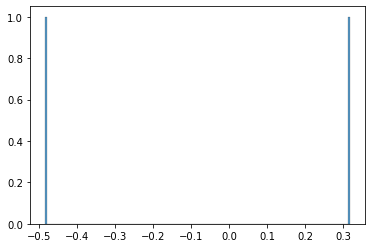

In [4]:
surr='fs'

n_h = 2

name= f'add2_{time_window}_d_{n_h}_{surr}'

hidden = (n_h, 1, 'f')
snn = RSNN_d_i('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(50,1), thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction2', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)

In [10]:
snn_d50_fs = ModelLoader('add2_50_d_128_fs', ckpt_dir, batch_size, device)
snn_rnn50_fs = ModelLoader('add2_50_rnn_128_fs', ckpt_dir, batch_size, device)

delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
delays: [0]
instance of <class 'my_snn.rsnn_delays.RSNN_d_i'> loaded sucessfully


### Time window=500

In [1]:
from my_snn.rsnn import RSNN, RSNN_2l, RSNN_2l_ALIF
from my_snn.rsnn_delays import RSNN_d_d, RSNN_d_i, RSNN_d_all
from my_snn.tonic_dataloader import DatasetLoader
from my_snn.custom_dataloader import AddTaskDatasetLoader, AddTask2DatasetLoader
from my_snn.utils import train, training_plots, ModelLoader
import torch
device = "cuda:0"

time_window = 500
batch_size = 128 # 128: anil kag
from torch.utils.data import DataLoader
#d_train = AddTaskDatasetLoader(time_window, batch_size)
d_train = AddTask2DatasetLoader(time_window, batch_size, randomness=True)
d_test = AddTask2DatasetLoader(time_window, batch_size, randomness=True) # 2560 from schmiduber paper
train_loader = DataLoader(d_train, batch_size=batch_size, num_workers=0)
test_loader = DataLoader(d_test, batch_size=batch_size, num_workers=0)
ckpt_dir = 'addsum_tests'

data = train_loader, test_loader

def test_fn(snn, ckpt_dir, test_loader, max_acc, epoch):
    if (epoch + 1) % 5 == 0:
        #if epoch>=50:
            #print('pooling delays')
            #snn.pool_delays('i', k= 10, freeze=False)
        for images, labels in test_loader:
            pred, ref = snn.propagate(images.to(device), labels.to(device))
            
        correct = torch.sum(abs(pred-ref) < 0.04)
        print(f'Test set accuracy: {100*correct.item()/len(images)}% ')
        print('--------------------------')
    return max_acc

delays: [0]
RSNN_d_d(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=2, out_features=128, bias=False)
  (r1_r1): Linear(in_features=128, out_features=128, bias=False)
  (r1_o): Linear(in_features=128, out_features=1, bias=False)
)
Total params: 16768
Total mult-adds (M): 8.384
training custom_2_1_128500_RSNN_d_d_1l128_1d1.t7 for 5000 epochs...
Epoch [1/5000]


C:\Users\saucedo\Python\SRNN_tests\my_snn\custom_dataloader.py:216: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(image[idxa,0]+image[idxb,0])


Step [1/1], Loss: 3.04004
Time elasped: 1.5239992141723633
Epoch [2/5000]
Step [1/1], Loss: 1.52659
Time elasped: 1.5069715976715088
Epoch [3/5000]
Step [1/1], Loss: 0.55174
Time elasped: 1.4640429019927979
Epoch [4/5000]
Step [1/1], Loss: 0.18382
Time elasped: 1.4683268070220947
Epoch [5/5000]
Step [1/1], Loss: 0.41147
Time elasped: 1.4865152835845947
Test set accuracy: 3.125% 
--------------------------
Epoch [6/5000]
Step [1/1], Loss: 0.59304
Time elasped: 1.4779767990112305
Epoch [7/5000]
Step [1/1], Loss: 0.74692
Time elasped: 1.475999355316162
Epoch [8/5000]
Step [1/1], Loss: 0.61665
Time elasped: 1.4730019569396973
Epoch [9/5000]
Step [1/1], Loss: 0.44738
Time elasped: 1.580063819885254
Epoch [10/5000]
Step [1/1], Loss: 0.27482
Time elasped: 1.4609708786010742
Test set accuracy: 6.25% 
--------------------------
Epoch [11/5000]
Step [1/1], Loss: 0.21952
Time elasped: 1.4659998416900635
Epoch [12/5000]
Step [1/1], Loss: 0.16215
Time elasped: 1.4490180015563965
Epoch [13/5000]
Ste

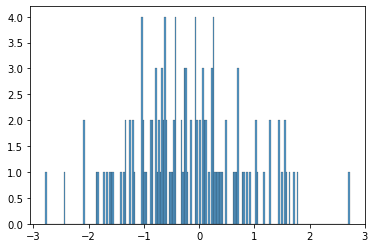

In [2]:
surr='fs'

name= f'add2_{time_window}_rnn_128_{surr}'

hidden = (128, 1, 'r')
snn = RSNN_d_d('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(1,1), thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction2', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)

delays: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490]
RSNN_d_d(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=2, out_features=128, bias=False)
  (f1_o): Linear(in_features=6400, out_features=1, bias=False)
)
Total params: 6656
Total mult-adds (M): 3.328
training custom_2_1_128500_RSNN_d_d_1l128_500d10.t7 for 5000 epochs...
Epoch [1/5000]


C:\Users\saucedo\Python\SRNN_tests\my_snn\custom_dataloader.py:216: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(image[idxa,0]+image[idxb,0])


Step [1/1], Loss: 0.79771
Time elasped: 2.1010897159576416
Epoch [2/5000]
Step [1/1], Loss: 1.14372
Time elasped: 2.1060004234313965
Epoch [3/5000]
Step [1/1], Loss: 0.59212
Time elasped: 2.1057794094085693
Epoch [4/5000]
Step [1/1], Loss: 0.19343
Time elasped: 2.102997064590454
Epoch [5/5000]
Step [1/1], Loss: 0.54681
Time elasped: 2.1068344116210938
Test set accuracy: 1.5625% 
--------------------------
Epoch [6/5000]
Step [1/1], Loss: 0.51576
Time elasped: 2.144972324371338
Epoch [7/5000]
Step [1/1], Loss: 0.34415
Time elasped: 2.099010944366455
Epoch [8/5000]
Step [1/1], Loss: 0.15642
Time elasped: 2.101999521255493
Epoch [9/5000]
Step [1/1], Loss: 0.38095
Time elasped: 2.1035068035125732
Epoch [10/5000]
Step [1/1], Loss: 0.43810
Time elasped: 2.1020007133483887
Test set accuracy: 7.03125% 
--------------------------
Epoch [11/5000]
Step [1/1], Loss: 0.38709
Time elasped: 2.1039719581604004
Epoch [12/5000]
Step [1/1], Loss: 0.17506
Time elasped: 2.100999593734741
Epoch [13/5000]
St

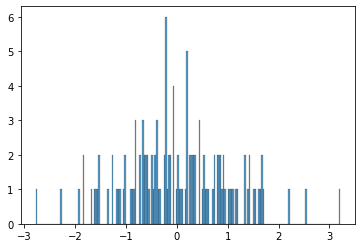

In [4]:
surr='fs'

name= f'add2_{time_window}_d_128_{surr}'

hidden = (128, 1, 'f')
snn = RSNN_d_d('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(500,10), thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction2', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)